### **Description du dataset:**

Ce dataset contient les résultats d'examens de 1000 étudiants dans plusieurs matières : Hindi, Anglais, Science, Mathématiques, Histoire et Géographie. Ce dataset est utilisé pour prédire si un étudiant réussira (Pass) ou échouera (Fail) basé sur ses résultats dans ces matières.

Les colonnes du dataset sont les suivantes :
- **Hindi** : La note obtenue par l'étudiant en langue hindi.
- **English** : La note obtenue en anglais.
- **Science** : La note obtenue en sciences.
- **Maths** : La note obtenue en mathématiques.
- **History** : La note obtenue en histoire.
- **Geography** : La note obtenue en géographie.
- **Total** : Le total des points obtenus dans toutes les matières.
- **Results** : Le résultat de l'étudiant (Pass=1 ou Fail=0), qui sera notre **variable cible**.
- **Div** : La division de l'étudiant (First, Second, Third, Fail), mais elle peut ne pas être nécessaire dans l'analyse.

### **Objectif du projet:**

L'objectif de ce projet est de créer un modèle de **Machine Learning supervisé** pour prédire si un étudiant va réussir ou échouer (Pass ou Fail) en fonction de ses notes dans les différentes matières.

Ce problème est un **problème de classification binaire** (Pass ou Fail).


### **Modèles à tester :**
Ce projet permet aussi de comparer plusieurs modèles de classification :

- Logistic Regression

- KNN (K-Nearest Neighbors)

- SVM (Support Vector Machine)

- Decision Tree

- Random Forest


### **Chaque modèle est évalué selon :**

- Accuracy

- F1 Score

- Rapport de classification

- Matrice de confusion

***L’objectif est de tester la performance de chaque modèle, pour savoir lequel fait les meilleures prédictions, puis sauvegarder le meilleur.***

### **Exploration générale de data:**

In [101]:
#Importation des bibliothèques nécessaires:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [102]:
#Chargement du dataset
df = pd.read_csv("results.csv")

# Affichage des 5 premières lignes
print("Aperçu du dataset :")
display(df.head())

# Affichage des informations générales (types, valeurs manquantes, etc.)
print("Infos générales :")
df.info()

Aperçu du dataset :


,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


Infos générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   Hindi       1000 non-null   int64
 2   English     1000 non-null   int64
 3   Science     1000 non-null   int64
 4   Maths       1000 non-null   int64
 5   History     1000 non-null   int64
 6   Geograpgy   1000 non-null   int64
 7   Total       1000 non-null   int64
 8   Results     1000 non-null   int64
 9   Div         1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [103]:
df.describe()#afficher les statistiques descriptives

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,51.645000,50.110000,49.440000,49.553000,49.03400,50.028000,299.810000,0.350000,1.856000
std,288.819436,29.471912,28.048505,28.921114,28.632447,28.76975,28.710268,71.865239,0.477208,0.904479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,103.000000,0.000000,0.000000
25%,249.750000,26.000000,26.000000,25.000000,25.750000,24.00000,26.000000,254.000000,0.000000,1.000000
50%,499.500000,53.000000,50.500000,50.000000,49.000000,49.00000,49.000000,296.000000,0.000000,2.000000
75%,749.250000,77.000000,75.000000,73.250000,74.000000,73.25000,75.000000,349.250000,1.000000,3.000000
max,999.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,505.000000,1.000000,3.000000


### **Visaulisation des donnes:**

#### histogramme des données:

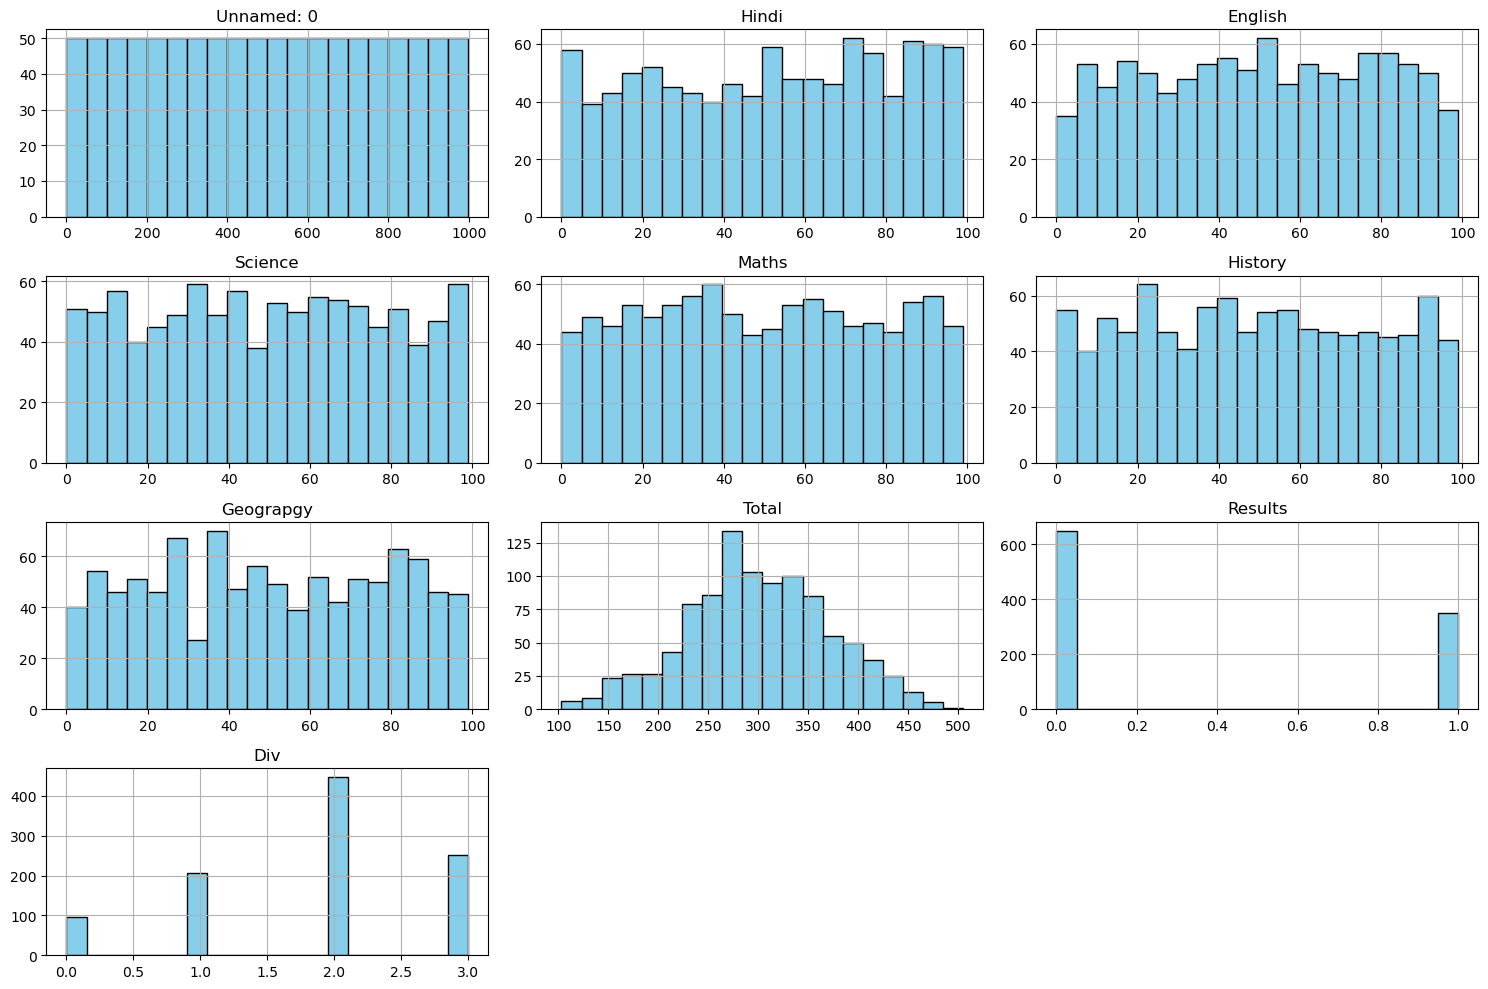

In [104]:
df.hist(figsize=(15, 10), bins=20, color="skyblue", edgecolor="black")
plt.tight_layout()
plt.savefig("histogram.png")
plt.show()

### Box plot pour toutes les colonnes:

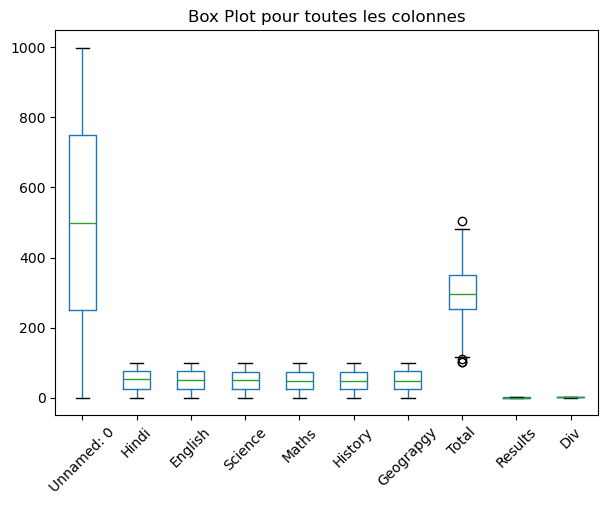

In [105]:
df.boxplot(figsize=(7, 5), grid=False, rot=45)
plt.title("Box Plot pour toutes les colonnes")
plt.savefig("boxplot.png")
plt.show()

### Heatmap des Corrélations:

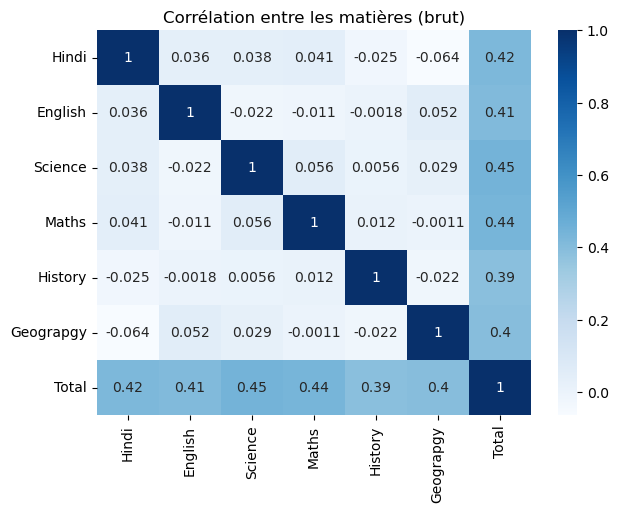

In [106]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Hindi', 'English', 'Science', 'Maths', 'History', 'Geograpgy', 'Total']].corr(), annot=True, cmap='Blues')
plt.title("Corrélation entre les matières (brut)")
plt.savefig("graph_corr.png")
plt.show()

#### la relation entre la colonne "Total" et "Resultat":

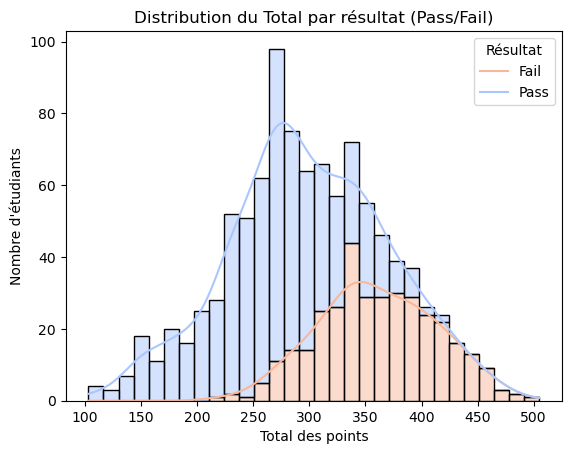

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme de la variable Total, séparé par résultat
sns.histplot(data=df, x='Total', hue='Results', bins=30, kde=True, palette='coolwarm', multiple='stack')
plt.title("Distribution du Total par résultat (Pass/Fail)")
plt.xlabel("Total des points")
plt.ylabel("Nombre d'étudiants")
plt.legend(title='Résultat', labels=['Fail', 'Pass'])
plt.savefig("Distribution_Total_Resultat.png")
plt.show()


#### Moyennes des notes selon le résultat (Pass / Fail):

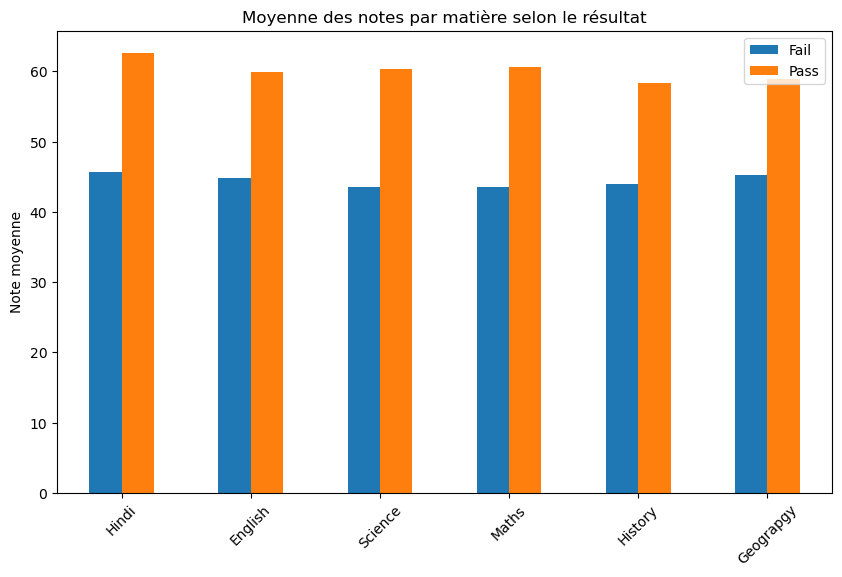

In [108]:
subject_cols = ["Hindi", "English", "Science", "Maths", "History", "Geograpgy"]
df.groupby("Results")[subject_cols].mean().T.plot(kind="bar", figsize=(10, 6))
plt.title("Moyenne des notes par matière selon le résultat")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45)
plt.legend(["Fail", "Pass"])
plt.savefig("Moyennes des notes selon le résultat.png")
plt.show()


### **Prétraitement des données:**

#### ***Nettoyage des donnes:***

#### Vérifier les valeurs manquantes:

In [109]:
df.isnull().sum()#afficher le nombre de valeurs manquantes par colonne

Unnamed: 0    0
Hindi         0
English       0
Science       0
Maths         0
History       0
Geograpgy     0
Total         0
Results       0
Div           0
dtype: int64

#### Vérification des doublons:

In [110]:
df.duplicated().sum()#afficher le nombre de doublons

0

#### Détection et traitement des valeurs aberrantes:

In [111]:
# Liste des colonnes numériques à vérifier (on exclut "Results")
colonnes_numeriques = ["Hindi", "English", "Science", "Maths", "History", "Geograpgy", "Total"]

# Détection et suppression des outliers avec la méthode IQR
for col in colonnes_numeriques:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    I1 = Q1 - 1.5 * IQR
    I2 = Q3 + 1.5 * IQR
    
    # Supprimer les lignes hors des bornes
    df= df[(df[col] >= I1) & (df[col] <= I2)]

# Afficher la taille après nettoyage
print(f"Nombre de lignes après suppression des outliers : {df.shape[0]}")

Nombre de lignes après suppression des outliers : 996


#### Supprimer uniquement les colonnes vraiment inutiles:

In [112]:
df.drop(columns=["Unnamed: 0","Total","Div"], inplace=True)

#### Renommer la colonne "Geograpgy" en "Geography":

In [113]:
df.rename(columns={"Geograpgy": "Geography"}, inplace=True)

#### Revérifier le type de chaque colonne:

In [114]:
print("Types de données après prétraitement :")
print(df.dtypes)

Types de données après prétraitement :
Hindi        int64
English      int64
Science      int64
Maths        int64
History      int64
Geography    int64
Results      int64
dtype: object


## **Machine Learning:**

In [115]:
from imblearn.over_sampling import SMOTE
#Séparation des features et de la target
X = df.drop(columns=["Results"])
y = df["Results"]

#Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")  # Vérification des tailles

# Normalisation des données sur les features (X) uniquement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Application de SMOTE sur les données d'entraînement normalisées
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Vérification de la distribution des classes avant et après SMOTE
print(f"Avant SMOTE - Classe 0: {y_train.value_counts()[0]}, Classe 1: {y_train.value_counts()[1]}")
print(f"Après SMOTE - Classe 0: {y_res.value_counts()[0]}, Classe 1: {y_res.value_counts()[1]}")


Train size: (796, 6), Test size: (200, 6)
Avant SMOTE - Classe 0: 509, Classe 1: 287
Après SMOTE - Classe 0: 509, Classe 1: 509


#### ***Création du modèle de régression logistique:***

Accuracy: 0.79
F1 Score: 0.67
Rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       138
           1       0.65      0.69      0.67        62

    accuracy                           0.79       200
   macro avg       0.75      0.76      0.76       200
weighted avg       0.79      0.79      0.79       200



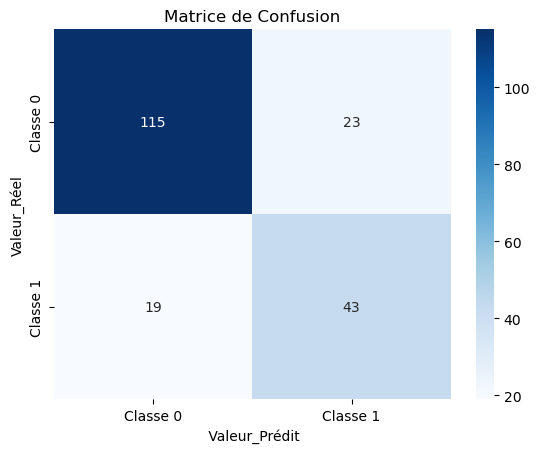

In [116]:
# Création et entraînement du modèle de régression logistique
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)

# Prédiction sur les données de test
y_pred = model.predict(X_test_scaled)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# F1-score du modèle
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

#rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

#### ***KNN (K-Nearest Neighbors):***

Accuracy KNN : 0.875
F1 Score KNN : 0.8031496062992126
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       138
           1       0.78      0.82      0.80        62

    accuracy                           0.88       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200



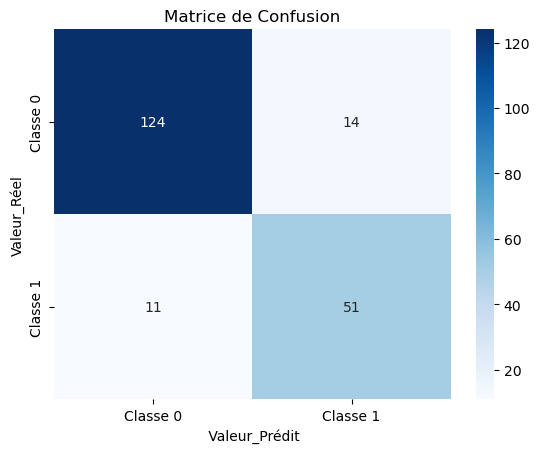

In [117]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_res, y_res)
y_pred_knn = knn.predict(X_test_scaled)

# Évaluation de la performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy KNN : {accuracy_knn}")
print(f"F1 Score KNN : {f1_knn}")
print("Classification Report KNN:\n", classification_report(y_test, y_pred_knn))
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

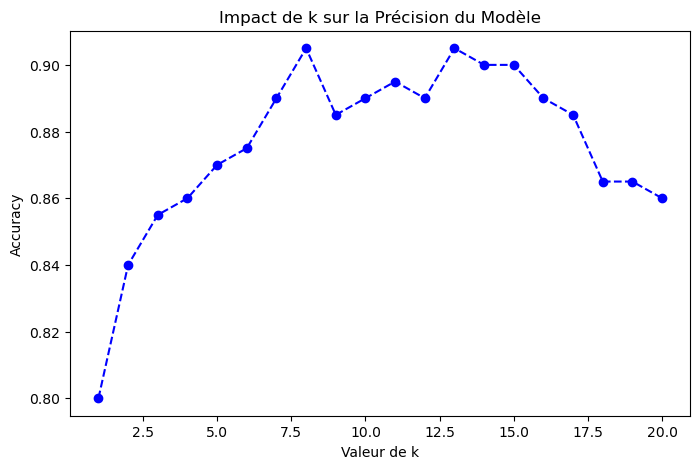

In [118]:
# Tester différents k et observer l'impact sur la précision
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Visualisation des performances
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy")
plt.title("Impact de k sur la Précision du Modèle")
plt.show()


### ***Decision Tree:***

In [119]:
#Modèle Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

D_tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    random_state=42
)

D_tree.fit(X_res, y_res)
y_pred_tree = D_tree.predict(X_test_scaled)

Accuracy Decision Tree : 0.97
F1 Score Decision Tree : 0.9523809523809523
Classification Report Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       138
           1       0.94      0.97      0.95        62

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



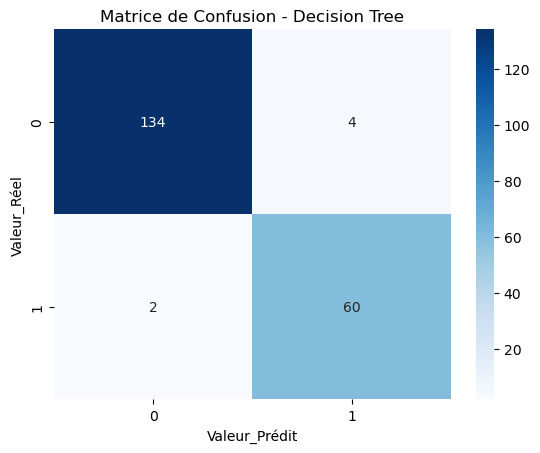

In [120]:
#Évaluation du modèle:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

accuracy_D_tree = accuracy_score(y_test, y_pred_tree)
f1_dt = f1_score(y_test, y_pred_tree)

print(f"Accuracy Decision Tree : {accuracy_D_tree}")
print(f"F1 Score Decision Tree : {f1_dt}")
print("Classification Report Decision Tree:\n", classification_report(y_test, y_pred_tree))

#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion - Decision Tree")
plt.show()

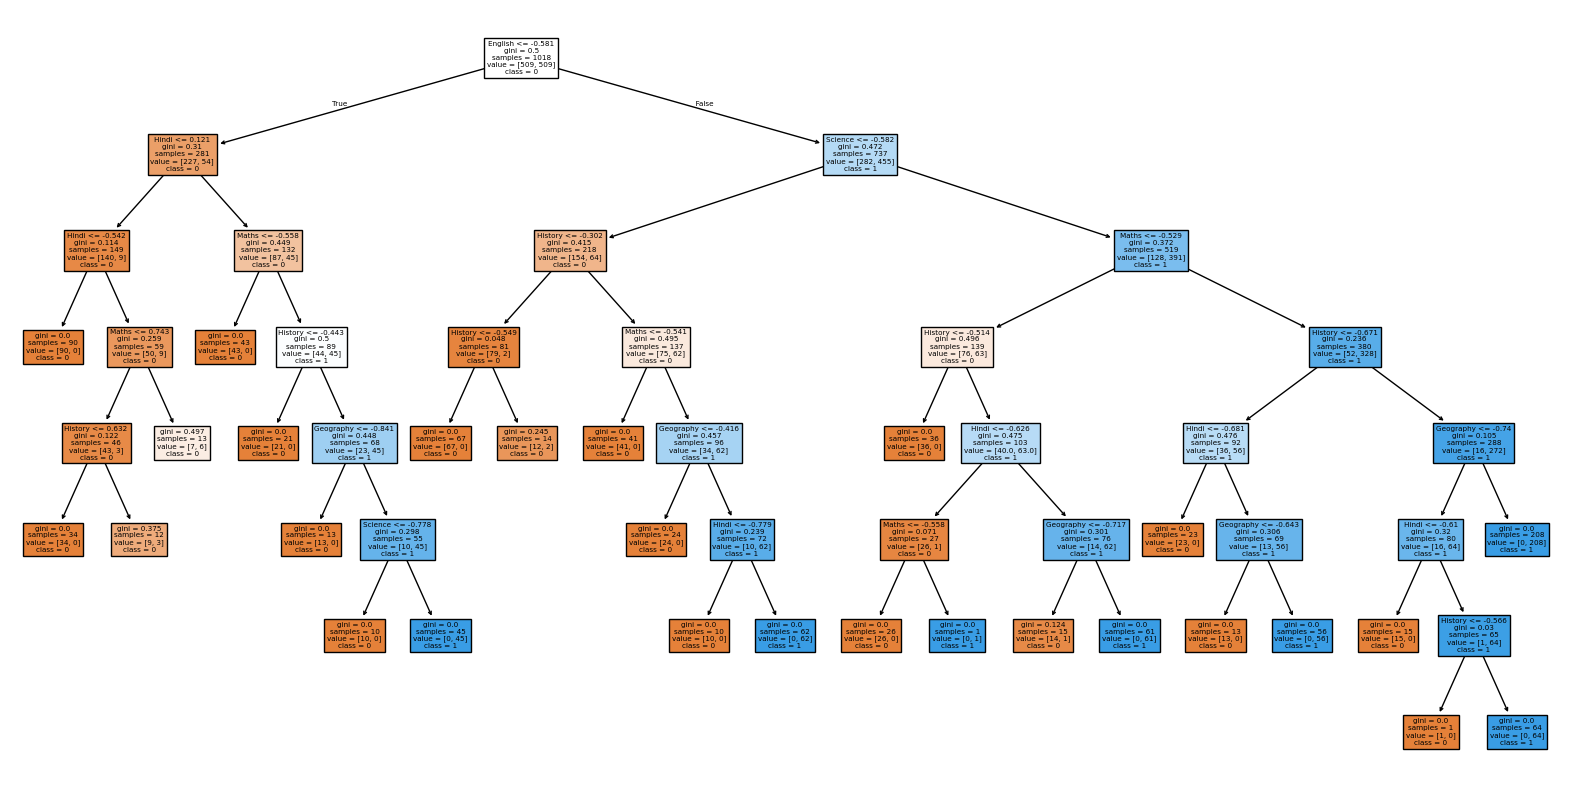

In [121]:
#Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(D_tree, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()


### ***Random Forest:***

Accuracy Random Forest : 0.975
F1 Score Random Forest : 0.9612403100775194
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       138
           1       0.93      1.00      0.96        62

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



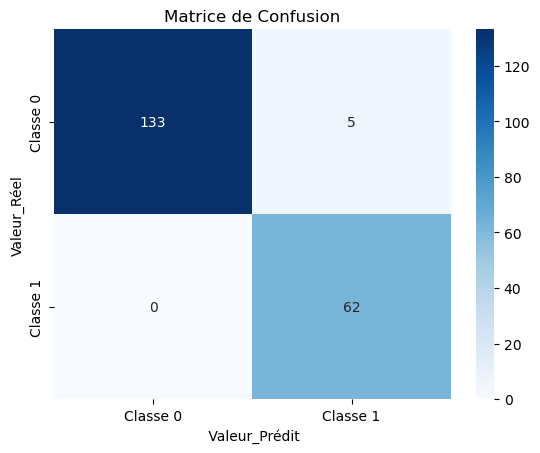

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1. Entraîner un Random Forest avec des paramètres optimisés
rf = RandomForestClassifier(
n_estimators=50,criterion="gini",class_weight='balanced',max_depth=70,random_state=42)

# Entraîner le modèle sur les données équilibrées après SMOTE et normalisation
rf.fit(X_res, y_res)

# Prédictions sur l'ensemble de test
y_pred_rf = rf.predict(X_test_scaled)

# Évaluation des performances
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy Random Forest : {accuracy_rf}")
print(f"F1 Score Random Forest : {f1_rf}")
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()


### ***SVM:***

Accuracy SVM : 0.905
F1 Score SVM : 0.8455284552845529
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       138
           1       0.85      0.84      0.85        62

    accuracy                           0.91       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.91      0.90       200



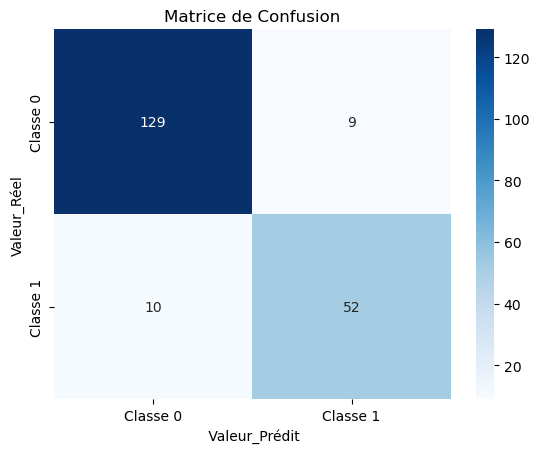

In [123]:
from sklearn.svm import SVC

# 1. Initialiser un modèle SVM avec noyau RBF
svm = SVC(kernel='rbf',random_state=42, class_weight='balanced')

# 2. Entraîner le modèle SVM sur les données équilibrées après SMOTE et normalisation
svm.fit(X_res, y_res)

# 3. Prédictions sur l'ensemble de test
y_pred_svm = svm.predict(X_test_scaled)

# 4. Évaluation des performances
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy SVM : {accuracy_svm}")
print(f"F1 Score SVM : {f1_svm}")
print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel(" Valeur_Prédit")
plt.ylabel("Valeur_Réel")
plt.title("Matrice de Confusion")
plt.show()

### **Resultats:**

In [124]:
# Affichage des résultats
print(f"L'accuracy du Logistic Regression : {accuracy:.2f}")
print(f"L'accuracy du modèle KNN : {accuracy_knn:.2f}")
print(f"L'accuracy du modèle Decision Tree : {accuracy_D_tree:.2f}")
print(f"L'accuracy du modèle Random Forest : {accuracy_rf:.2f}")
print(f"L'accuracy du modèle SVM : {accuracy_svm:.2f}")


L'accuracy du Logistic Regression : 0.79
L'accuracy du modèle KNN : 0.88
L'accuracy du modèle Decision Tree : 0.97
L'accuracy du modèle Random Forest : 0.97
L'accuracy du modèle SVM : 0.91


In [125]:
# Rapport de classification pour Logistic Regression
print("Rapport de classification : Logistic Regression")
print(classification_report(y_test, y_pred))

# Rapport de classification pour KNN
print("\nRapport de classification : KNN")
print(classification_report(y_test, y_pred_knn))

# Rapport de classification pour Decision Tree
print("\nRapport de classification : Decision Tree")
print(classification_report(y_test, y_pred_tree))

# Rapport de classification pour Random Forest
print("\nRapport de classification : Random Forest")
print(classification_report(y_test, y_pred_rf))

# Rapport de classification pour SVM
print("\nRapport de classification : SVM")
print(classification_report(y_test, y_pred_svm))

Rapport de classification : Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       138
           1       0.65      0.69      0.67        62

    accuracy                           0.79       200
   macro avg       0.75      0.76      0.76       200
weighted avg       0.79      0.79      0.79       200


Rapport de classification : KNN
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       138
           1       0.78      0.82      0.80        62

    accuracy                           0.88       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200


Rapport de classification : Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       138
           1       0.94      0.97      0.95        62

    accuracy                           0.97       200
   m

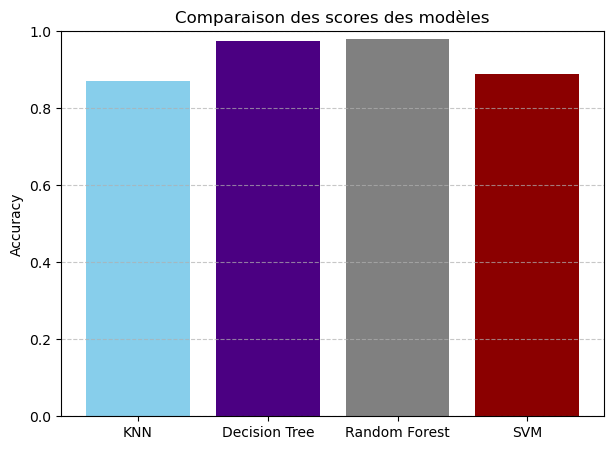

In [126]:
#Dictionnaire des modèles
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Stockage des scores
scores = {}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc

#  Tracer le graphe
plt.figure(figsize=(7, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'Indigo', 'gray', 'Darkred'])
plt.title('Comparaison des scores des modèles')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # scores entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Conclusion finale:**
Le projet a été bien structuré : exploration des données, prétraitement, comparaison de plusieurs modèles, et sauvegarde du meilleur.
Le modèle Random Forest a été retenu pour sa précision élevée, sa robustesse et sa capacité à gérer les données déséquilibrées, ce qui en fait le choix optimal pour la prédiction du succès ou de l’échec des étudiants.

### **Sauvegarde du modèle:**

In [127]:
import pickle 
# save the model
with open('model_RF.pkl', 'wb') as file:
    pickle.dump(models['Random Forest'], file)

In [128]:
# load the model
with open('model_RF.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

**Le modèle a été sauvegardé avec pickle pour un usage futur, et une application Streamlit a été créée pour permettre des prédictions interactives.**